# Data Analysis of NBA Season 2017 - 2018 Using Data from ESPN

#### Importing Modules 

In [2]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen 
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#### Setup to Scrape Data from ESPN NBA Standings 2017-2018 using BeautifulSoup 

In [3]:
url = 'http://www.espn.com/nba/standings/_/group/league'
page = urlopen(url).read()
page_soup = bs(page,'html.parser')
tables = page_soup.findAll('tbody',{'class':'Table2__tbody'})

#### Getting Team Code and Team Names 

In [4]:
teaminfo  = []
teams = tables[0]  #Teams Table with Team Code and Team Name
for each in teams:
    team = each.findAll('span')
    teamcode = (team[2].text)
    teamname = (team[3].text)
    teaminfo.append((teamname,teamcode))

#### Getting Stats for Each Team

In [5]:
teamstat = []
stats = tables[1] #Stats Table with Individual Team stats
statrows = stats.findAll('tr')
for statrow in statrows:
    row = statrow.findAll('td')
    won = row[0].text
    loss = row[1].text
    percent = row[2].text
    gamesbehind = row[3].text
    homerecord = row[4].text
    awayrecord = row[5].text
    divrecord = row[6].text
    confrecord = row[7].text
    ppg = row[8].text
    oppg = row[9].text
    diff = row[10].text
    winstreak = row[11].text
    last10 = row[12].text
    teamstat.append((won,loss,percent,gamesbehind,homerecord,awayrecord,
         divrecord,confrecord,ppg,oppg,diff,winstreak,last10))

#### Combine Teaminfo and Teamstats to create single list for each team with Labels

In [7]:
statlist =[]
for teams,stats in zip(teaminfo,teamstat):
    statlist.append(list(teams) + list(stats))

labels = ['Team Name','Team Code','Win','Loss','Percent Win','Games Behind',
         'Home Record','Away Record','Division','Conference','PPG','Opp PPG',
         'PPG Difference','Win Streak','Last 10'] 

## Importing data into Pandas DataFrame

In [8]:
df = pd.DataFrame(statlist,columns=labels)

#### Changing 'Games Behind' value for Houston Rockets from a String Value '-' into INT value '0'

In [9]:
df.loc[0,('Games Behind')] = 0

#### Turning String Values into INT, FLOAT and NUMERIC Values

In [10]:
df[['Win','Loss','Games Behind']]=df[['Win','Loss','Games Behind']].astype(int)
df[['Percent Win','PPG','Opp PPG']] = df[['Percent Win','PPG','Opp PPG']].astype(float)
df['PPG Difference'] = pd.to_numeric(df['PPG Difference'])

#### Sample Pandas DataFrame of the Stats Data 

In [11]:
df.head()

,Team Name,Team Code,Win,Loss,Percent Win,Games Behind,Home Record,Away Record,Division,Conference,PPG,Opp PPG,PPG Difference,Win Streak,Last 10
0,Houston Rockets,HOU,65,17,0.793,0,34-7,31-10,12-4,41-11,112.4,103.9,8.5,L1,7-3
1,Toronto Raptors,TOR,59,23,0.720,6,34-7,25-16,12-4,40-12,111.7,103.9,7.8,L1,6-4
2,Golden State Warriors,GS,58,24,0.707,7,29-12,29-12,13-3,34-18,113.5,107.5,6.0,L1,4-6
3,Boston Celtics,BOS,55,27,0.671,10,27-14,28-13,12-4,33-19,104.0,100.4,3.6,W1,6-4
4,Philadelphia 76ers,PHI,52,30,0.634,13,30-11,22-19,9-7,34-18,109.8,105.3,4.5,W16,10-0


## Using Seaborn to Plot Relationship Between Stats

### Seaborn Bar Plot showing Team Code and Winning Percentage 

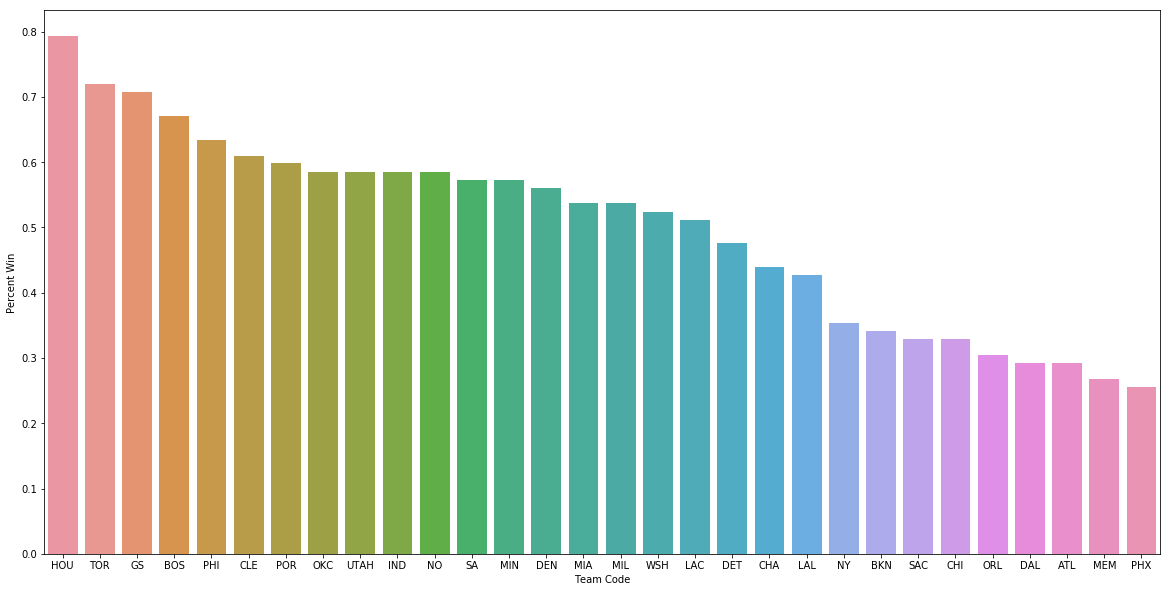

In [12]:
fig = plt.figure(figsize=(20,10))
sns.barplot(data=df, x='Team Code',y='Percent Win')

### Seaborn Joint Plot showing relationship between Number of Winning games vs Points Per Game Difference

#### There is a Linear correlation between Number of Wins vs PPG Difference shown by the Linear Regression Line

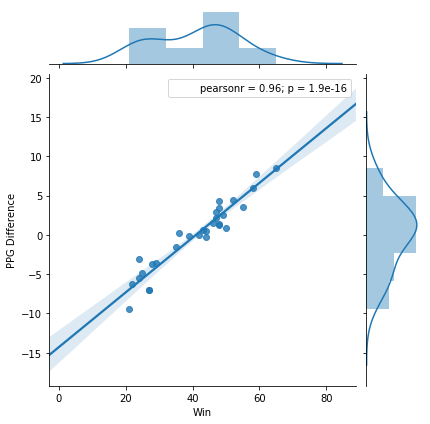

In [13]:
fig = plt.figure(figsize=(25,15))
sns.jointplot(data=df,x='Win',y='PPG Difference',kind='reg')

### Seaborn Violin Plot showing the relationship between Number of Wins vs PPG Difference

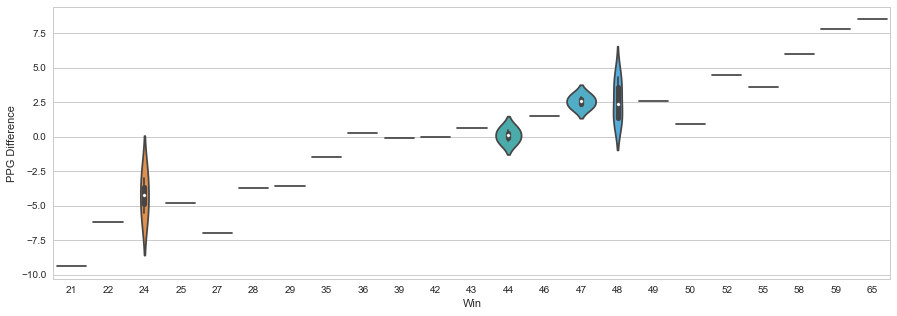

In [23]:
fig = plt.figure(figsize=(15,5))
sns.violinplot(x='Win',y='PPG Difference',data=df)

### Seaborn Strip Plot showing Relationship between Number of Wins vs Opponent Points Per Game

#### Chart shows that teams with higher number of wins do in average have lower Opp PPG compared to teams with lower number of wins giving up more points to opponents on average. However, there's no direct relationship

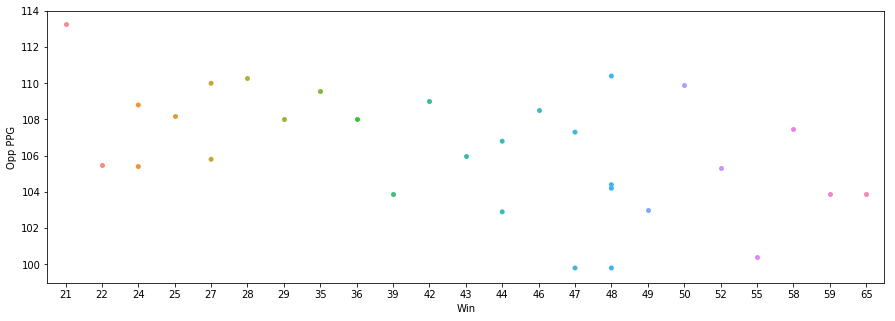

In [15]:
fig = plt.figure(figsize=(15,5))
sns.stripplot(x='Win',y='Opp PPG',data=df)

### Matplotlib Stacked Bar Plot showing the Number of Wins vs Number of Losses

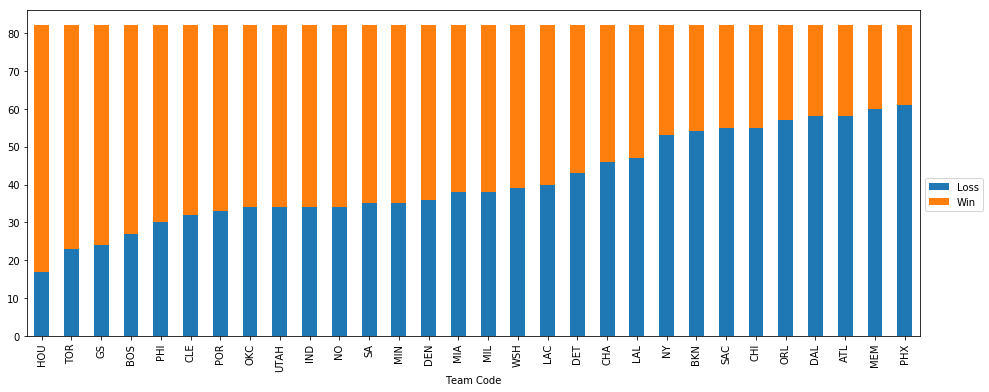

In [16]:
df2 = df[['Loss','Win']]
df2.plot.bar(x=df['Team Code'],stacked=True,figsize=(16,6)).legend(bbox_to_anchor=(1,0.5))

### Seaborn Stacked Horizontal Bar Plot showing relationship between Number of Losses and Opponent Points Per Game for each team

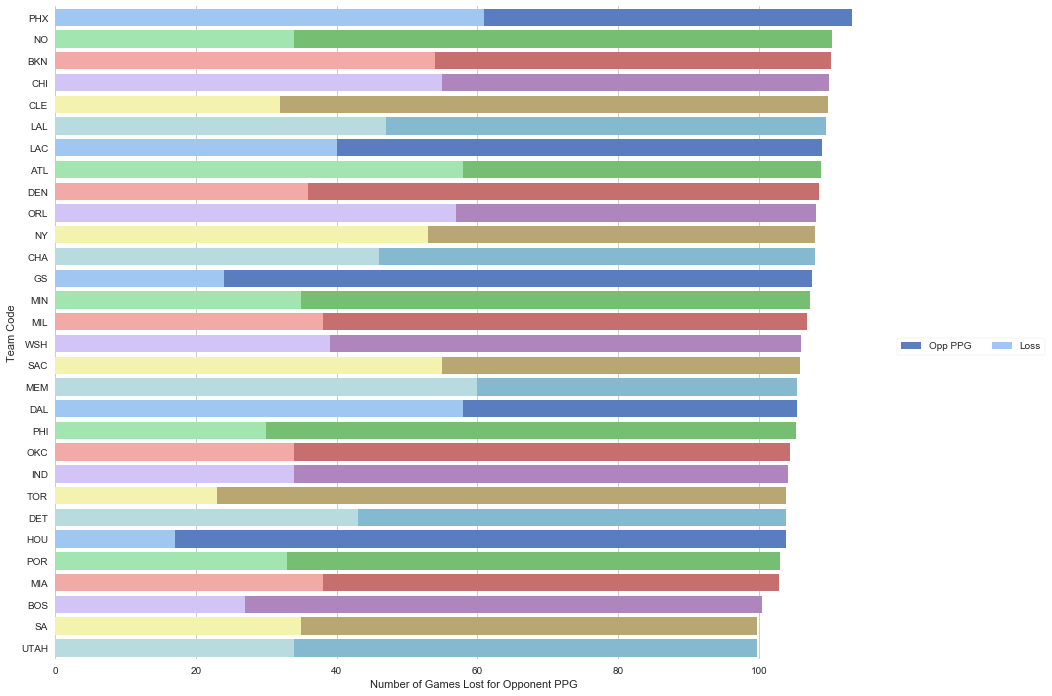

In [22]:
win = df.sort_values('Opp PPG',ascending=False)
f,ax = plt.subplots(figsize=(15,12))
sns.set(style='whitegrid')
sns.barplot(x='Opp PPG',y='Team Code',data=win,label='Opp PPG',palette='muted')
sns.barplot(x='Loss',y='Team Code',data=win,label='Loss',palette='pastel')
ax.legend(ncol=2, frameon=True, bbox_to_anchor=(1,0.5))
ax.set(xlabel='Number of Games Lost for Opponent PPG')
sns.despine(left=True,bottom=True)